# Health Insurance Cost Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Load the data set into data frame
df = pd.read_csv("D:\Collage & Bootcamp\Odin School\ML\Health_insurance_cost.csv")


In [39]:

df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,1,30.638217,0,0,1,16884.92400
1,18.0,0,33.770000,1,1,0,1725.55230
2,28.0,0,33.000000,3,1,0,4449.46200
3,33.0,0,22.705000,0,1,3,21984.47061
4,32.0,0,28.880000,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,0,30.970000,3,1,3,10600.54830
1334,18.0,1,31.920000,0,1,2,2205.98080
1335,18.0,1,36.850000,0,1,0,1629.83350
1336,21.0,1,25.800000,0,1,1,2007.94500


In [4]:
# Number of rows and columns
df.shape

(1338, 7)

In [5]:
# Display Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1338 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [6]:
# Display the first few rows
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.638217,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520


In [7]:
# Display last few rows
df.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [40]:
# Checking for Duplicates
df.duplicated().any()

True

In [47]:
# Duplicate row
df[df.duplicated()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
581,19.0,0,30.59,0,1,3,1639.5631


In [48]:
df = df.drop_duplicates()


In [49]:
# Duplicate row
df[df.duplicated()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price


In [43]:
df.shape

(1338, 7)

In [10]:
df["health_insurance_price"].fillna(df["health_insurance_price"].median(),inplace=True)

<Axes: xlabel='health_insurance_price', ylabel='Count'>

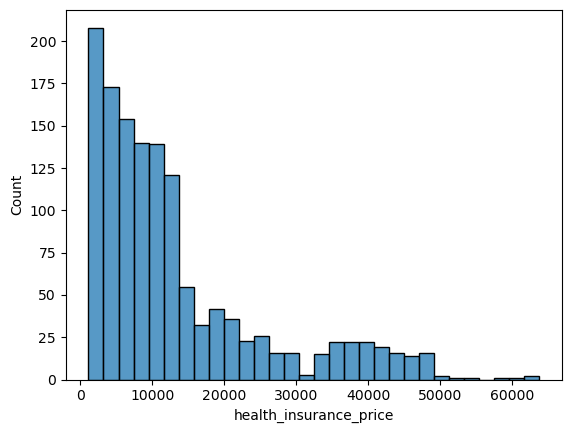

In [11]:
sns.histplot(df.health_insurance_price)

In [12]:
# Data Analysis
# Display summary statistics of numerical variables
df.describe()

,age,BMI,Children,health_insurance_price
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,13.907422,6.057517,1.205493,12103.734649
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4746.521225
50%,39.166412,30.495000,1.000000,9388.753650
75%,51.000000,34.430000,2.000000,16584.318157
max,64.000000,53.130000,5.000000,63770.428010


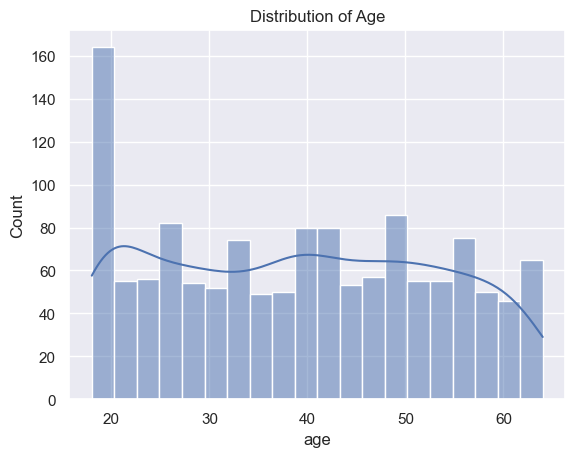

In [13]:
# Visualize the distribution of numerical variables
# Age Column
sns.set()
sns.histplot(df['age'], bins = 20, kde = True)
plt.title("Distribution of Age")
plt.show()

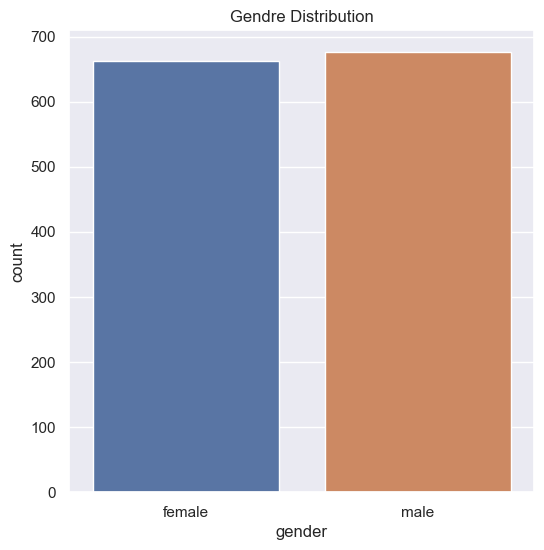

In [14]:
# Gender Column
plt.figure(figsize = (6,6))
sns.countplot(x = "gender", data = df)
plt.title("Gendre Distribution")
plt.show()

In [15]:
# Counts gender wise
df['gender'].value_counts()

male      676
female    662
Name: gender, dtype: int64

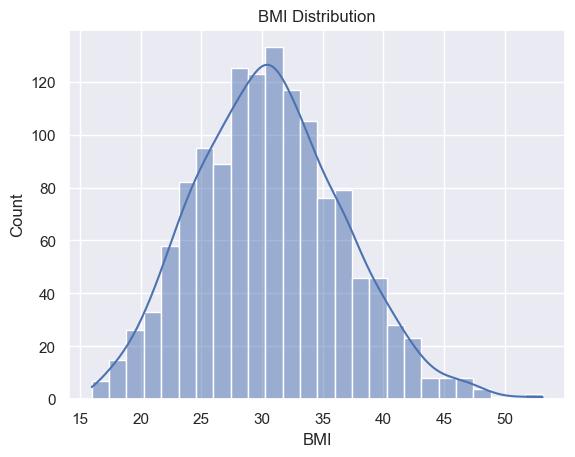

In [16]:
sns.histplot(df.BMI, kde=True)
plt.title("BMI Distribution")
plt.show()
# According to the CDC, a normal body mass index (BMI) range is 18.5–24.9:

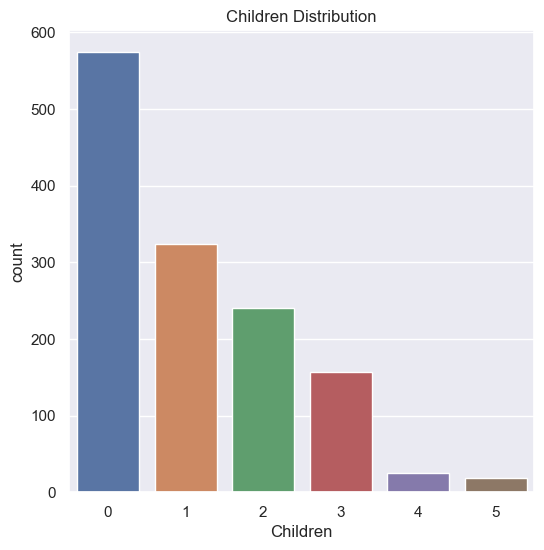

In [17]:
# Children Column
plt.figure(figsize = (6,6))
sns.countplot(x = "Children", data = df)
plt.title("Children Distribution")
plt.show()

In [18]:
# Count no. of children wise
df['Children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

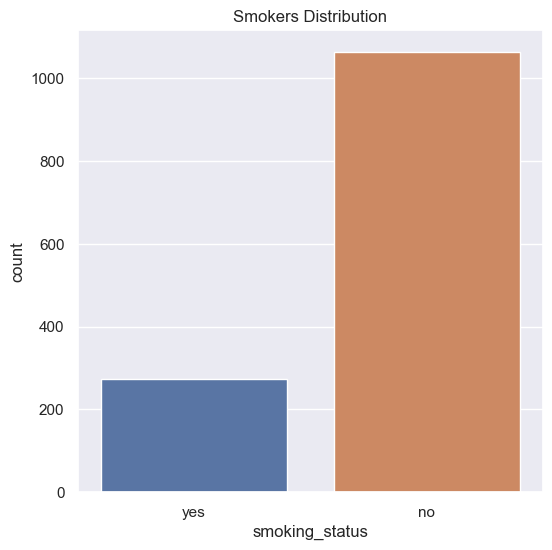

In [19]:
# smoking_status Column
plt.figure(figsize = (6,6))
sns.countplot(x = "smoking_status", data = df)
plt.title("Smokers Distribution")
plt.show()

In [20]:
# No. of Smokers and Non-smokers
df['smoking_status'].value_counts()

no     1064
yes     274
Name: smoking_status, dtype: int64

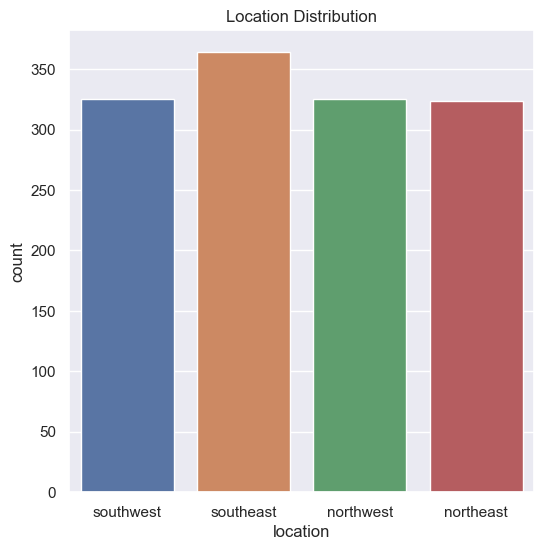

In [21]:
# location  Column
plt.figure(figsize = (6,6))
sns.countplot(x = "location", data = df)
plt.title("Location Distribution")
plt.show()

In [22]:
# No. of Different Locations
df['location'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64

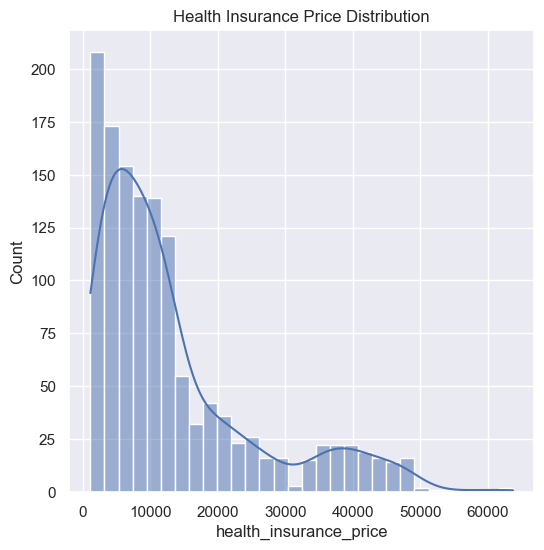

In [23]:
# health_insurance_price Column
plt.figure(figsize = (6,6))
sns.histplot(x = "health_insurance_price", data = df, kde = True)
plt.title("Health Insurance Price Distribution")
plt.show()

In [24]:
df.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [25]:
# Data Preprocessing
# encoding the catogorical features
# encoding 'gender' column
df.replace({'gender':{'male' : 0,'female' : 1}},inplace = True)
 # encoding 'smoking_status' column
df.replace({'smoking_status':{'yes' : 0,'no' : 1}},inplace = True)
# encoding 'location' column
df.replace({'location':{'southeast' : 0,'southwest' : 1,'northeast' : 2,'northwest' : 3}},inplace = True)
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,1,30.638217,0,0,1,16884.92400
1,18.0,0,33.770000,1,1,0,1725.55230
2,28.0,0,33.000000,3,1,0,4449.46200
3,33.0,0,22.705000,0,1,3,21984.47061
4,32.0,0,28.880000,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,0,30.970000,3,1,3,10600.54830
1334,18.0,1,31.920000,0,1,2,2205.98080
1335,18.0,1,36.850000,0,1,0,1629.83350
1336,21.0,1,25.800000,0,1,1,2007.94500


In [26]:
#Splittng the features and target
X = df.drop(columns = 'health_insurance_price', axis = 1)
Y = df['health_insurance_price']

In [27]:
X

,age,gender,BMI,Children,smoking_status,location
0,19.0,1,30.638217,0,0,1
1,18.0,0,33.770000,1,1,0
2,28.0,0,33.000000,3,1,0
3,33.0,0,22.705000,0,1,3
4,32.0,0,28.880000,0,1,3
...,...,...,...,...,...,...
1333,50.0,0,30.970000,3,1,3
1334,18.0,1,31.920000,0,1,2
1335,18.0,1,36.850000,0,1,0
1336,21.0,1,25.800000,0,1,1


In [28]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: health_insurance_price, Length: 1338, dtype: float64

In [29]:
# Splitting the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
X.shape,X_train.shape,X_test.shape

((1338, 6), (1070, 6), (268, 6))

In [31]:
# Model training
# Linear Regression
# Loading the linear regression model
# X = Input Features
# Y = Prediction Probability 
# c = Intercept
# m = Slope
# Line Equation 
# Y = mX+c
regressor = LinearRegression()

In [32]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [33]:
# Check the coefficients and intercept of the trained model
coefficients = regressor.coef_
intercept = regressor.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [ 2.45556220e+02 -2.66927858e+00  3.25999140e+02  5.73264551e+02
 -2.38295502e+04  1.95276139e+02]
Intercept: 11717.810546534187


In [34]:
# Modal Evalution
# Pridiction on training data
trining_data_prediction = regressor.predict(X_train)

In [35]:
# r squared value
r2_train = metrics.r2_score(Y_train, trining_data_prediction)
print('R squared value: ', r2_train)

R squared value:  0.7425134687266984


In [36]:
# Pridiction on test data
test_data_prediction = regressor.predict(X_test)

In [37]:
# r squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value: ', r2_test)

R squared value:  0.7438696111928454


In [38]:
# Building a predictive System
# filling encoded input data
input_data = (31,1,25.74,0,1,0) # on record value 3756

# Chaning input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)
print('Prediction cost in USD:', prediction[0])

[3889.05172023]
Prediction cost in USD: 3889.0517202265783


C:\Users\ankit\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
